## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## SOLUTION

## APPROCH TO FOLLOW: 
### > Basic Operations
### > Cleaning of Data
### > Correlation among the dataset
### > Data Wrangling and Visualisation

### IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### FILE PATH 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel_bookings=pd.read_csv('/content/drive/MyDrive/Hotel Bookings (6).csv')

### Let's play with basic operations

In [ ]:
hotel_bookings.shape

(119390, 32)

In [ ]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_bookings.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
hotel_bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

FINDING NULL VALUES

In [ ]:
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### As per basic operations we can see the data is so large to deal with , so let's clean the data.

## CLEANING OF DATA 
* Two features 'agent' and 'company' will be dropped bcoz according to me that are not relevant.

* However "country" also includes null values but is important so let's fill null values with "Undefined"

In [ ]:
hotel_bookings.drop(['agent' , 'company'] , axis = 1 , inplace = True)


In [ ]:
hotel_bookings["country"] = hotel_bookings["country"].fillna("Undefined")

In [ ]:
hotel_bookings.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02


### CORRELATION OF DATASET.

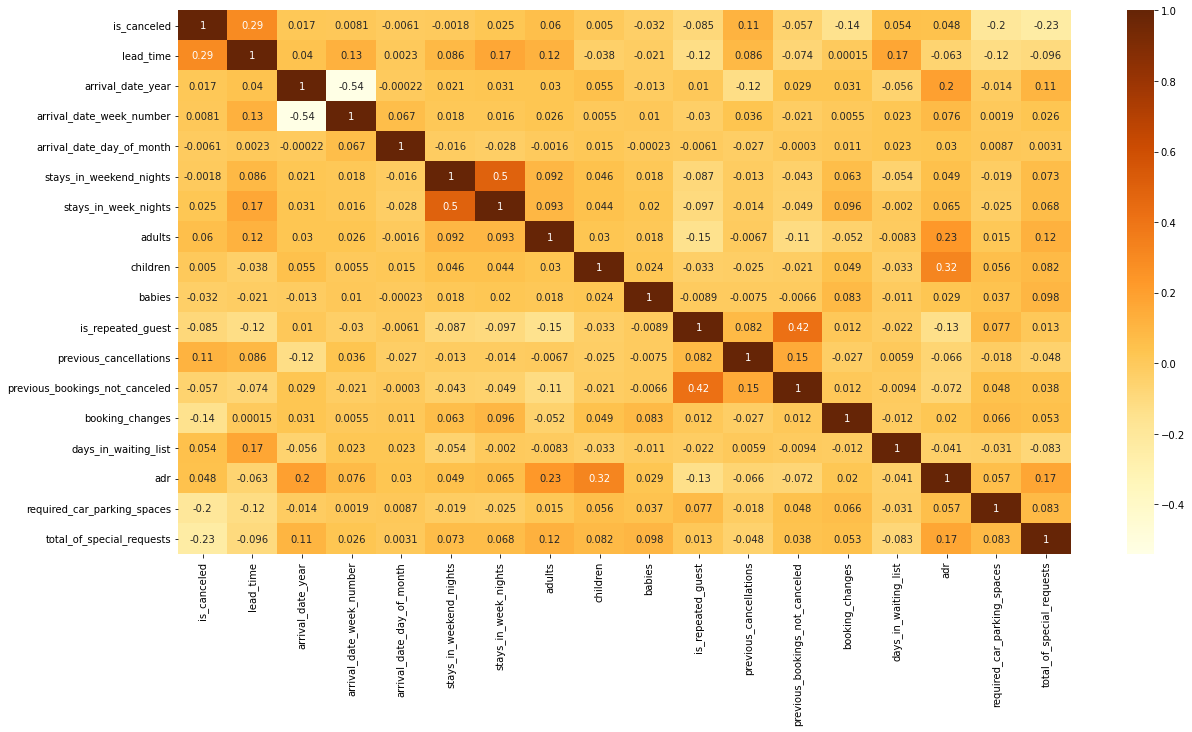

In [ ]:
corr = hotel_bookings.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True , cmap = "YlOrBr")

### Have you ever wondered when the best time of year to book a hotel room is? 

### Let's find out.

In [ ]:
hotel_bookings['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

### **OBSERVATION**

### As per the above table we can see months like August, July, May, October, April has alot of arrivals as compared to other months of year.

### Let's have a look to graph given below

[Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December'),
 Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June')]

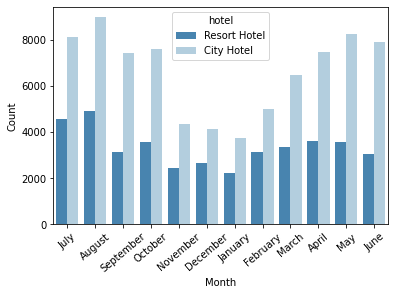

In [ ]:
mx=sns.countplot(x="arrival_date_month",hue="hotel",data=hotel_bookings,palette='Blues_r')
mx.set(xlabel="Month",ylabel="Count")
mx.set_xticklabels(mx.get_xticklabels() , rotation=40)



## Which hotel contains maximum number of bookings?

In [ ]:
hotel_bookings.hotel.agg(["value_counts"])

,value_counts
City Hotel,79330
Resort Hotel,40060


In [ ]:
hotel = ["City Hotel", "Resort Hotel"]
booking = hotel_bookings.hotel.value_counts()
color = ["y", "g"]

([<matplotlib.patches.Wedge at 0x7f4dc973e350>,
 [Text(-0.5433858480011854, 0.956416133381298, 'City Hotel'),
  Text(0.5433858480011848, -0.9564161333812983, 'Resort Hotel')],
 [Text(-0.2963922807279193, 0.5216815272988897, '66.45%'),
  Text(0.29639228072791896, -0.52168152729889, '33.55%')])

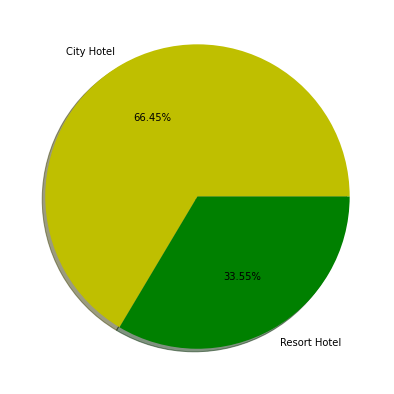

In [ ]:
plt.figure(figsize = (10, 7))
plt.pie(booking, labels = hotel, colors = color, autopct = "%.2f%%", shadow = True)

### **OBSERVATION**

###   City hotel contains maximum number of bookings.

## Which hotels have maximum number of cancellations ?

In [ ]:
hotel_bookings.groupby(['hotel'])['is_canceled'].agg(['value_counts']).T

hotel        City Hotel        Resort Hotel       
is_canceled           0      1            0      1
value_counts      46228  33102        28938  11122

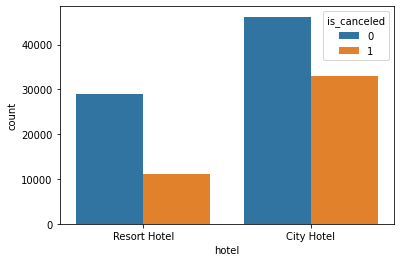

In [ ]:
sns.countplot(x = "hotel", hue = "is_canceled", data = hotel_bookings)

## **OBSERVATION**

City Hotel contains maximum number of cancellation of bookings

### **Type of booking, assuming one of four categories:**

* Contract

* Group

* Transient

* Transient-party

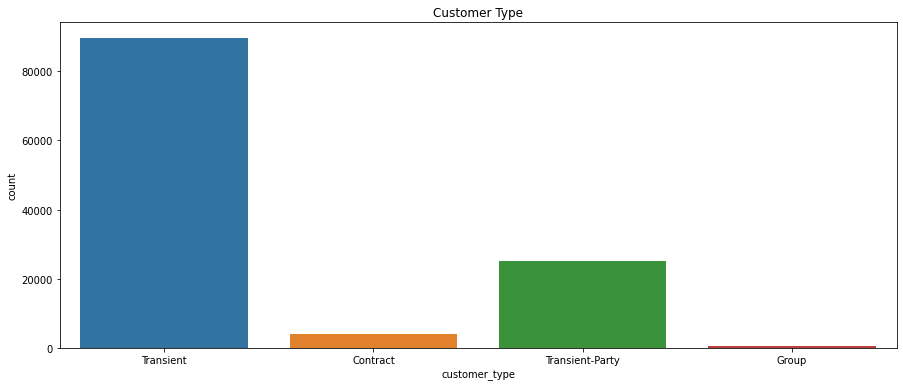

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='customer_type', data= hotel_bookings)
plt.title('Customer Type')
plt.show()

### OBSERVATION :

### Most of customers is Transient, means Transient customers are one of the major market segments consist of individuals or groups.

## **HOTEL MEALS:**

In [ ]:
hotel_meals = hotel_bookings['meal'].value_counts()/len(hotel_bookings['meal'])*100

## OBSERVATIONS

Type of meal booked. Categories are presented in standard hospitality meal packages:

* BB means Bed & Breakfast as much as 77.31%

* HB means Half board (breakfast and one other meal – usually dinner) as much as 12.11%

* FB means Full board (breakfast, lunch and dinner) as much as 0.66%

* Undefined/SC means no meal as much as 9.89%

Let's have a look to deposit type vs cancellation status

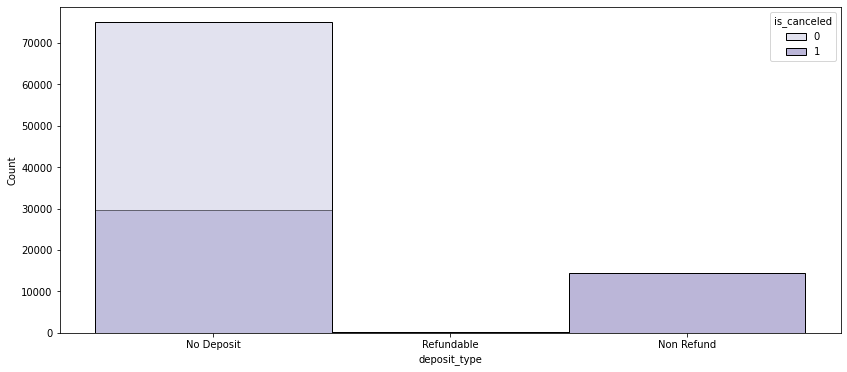

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(x='deposit_type',data=hotel_bookings ,hue='is_canceled',palette='Purples')
plt.show()

## OBSERVATIONS:

* About 30k bookings of deposit type 'No Deposit' were cancelled. 

* Also it is important to note that non-refundable deposits had more cancellation than refundable deposits.

## Ever thought where most of the guests belong?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

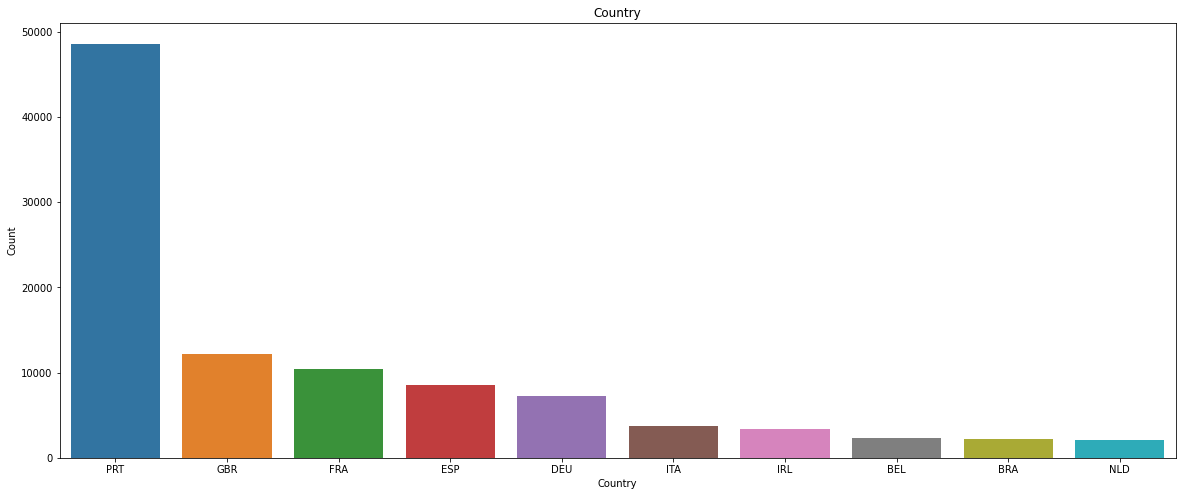

In [ ]:
plt.figure(figsize=(20,8))
df_country = hotel_bookings['country'].value_counts().nlargest(10).astype(int)
ax = sns.barplot(df_country.index, df_country.values)
plt.title('Country')
plt.xlabel('Country')
plt.ylabel('Count')

## OBSERVATION:
* Most of the guests belonged to Portugal,which indicates that probably this dataset belongs to some hotel in Portugal.

* Most tourists come from Europe since the top 5 countries are in Europe

### Reservation status

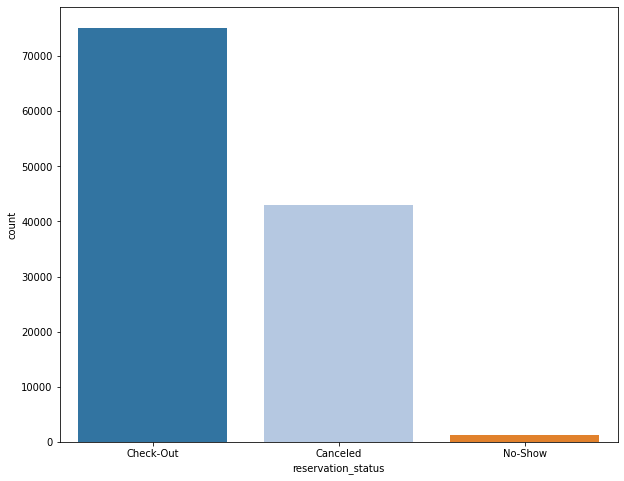

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="reservation_status", data = hotel_bookings, palette="tab20")


### Let's dig deeper into whether the stay is over a weekend or weekday

Text(0.5, 1.0, 'Number of stays on weekend nights')

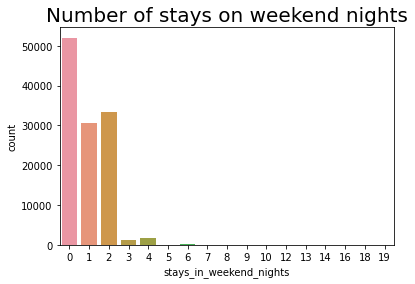

In [ ]:
sns.countplot(data = hotel_bookings, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)

Text(0.5, 1.0, 'Number of stays on weekday night')

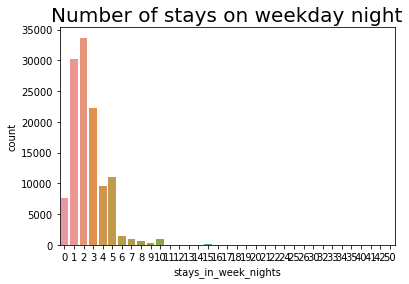

In [ ]:
sns.countplot(data = hotel_bookings, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 20)

## OBSERVATION:

* It seems that majority of the stays are over the weekday's night. Hence, it seems that whatever we saw for the chart on day of the month was random.

### **Arrival per year** 

Text(0.5, 1.0, 'Arrivals per year in Both hotels ')

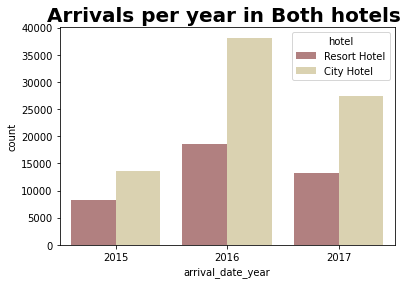

In [ ]:
sns.countplot(x='arrival_date_year',hue='hotel', data=hotel_bookings ,palette='pink')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)

### **OBSERVATIONS**

We can see most of the bookings were in the year 2016 and bookings were doine in City hotel

## How much do guests pay for a room type per night per person?


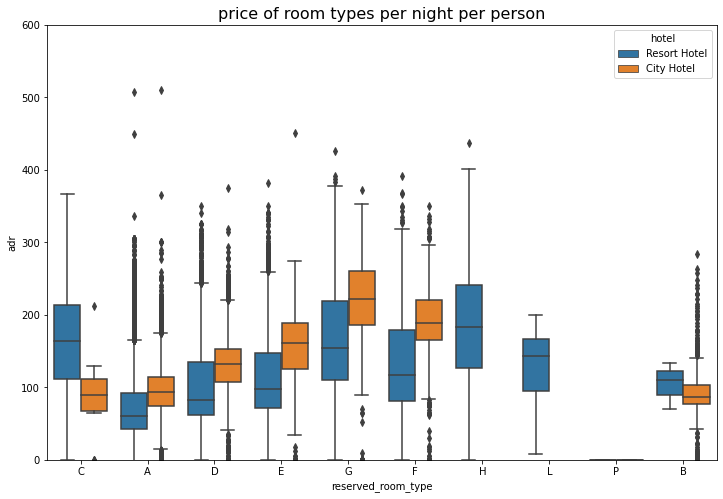

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x="reserved_room_type",
            y="adr",
            hue="hotel",
            data=hotel_bookings)
plt.title('price of room types per night per person',fontsize=16)
plt.ylim(0, 600)
plt.show()  

## OBSERVATION:

### For city hotels people pay more for g room type and for resort hotel people pay more for h room type

## **Let's find ou number of adults , childrens and babies in hotel.**

Text(0.5, 1.0, 'Number of Babies in both hotels')

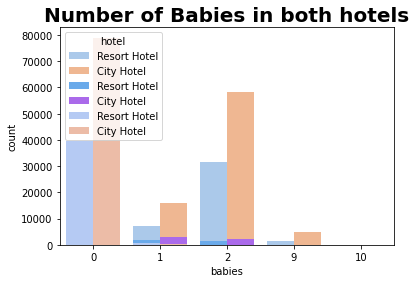

In [ ]:
sns.countplot(x='adults',hue='hotel', data=hotel_bookings, palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=20)



Text(0.5, 1.0, 'Number of Children in both hotels')

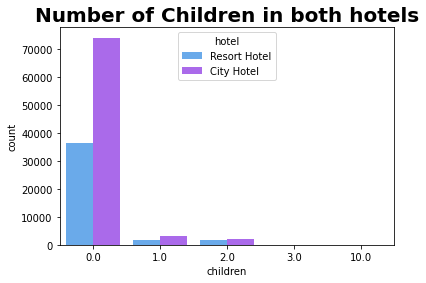

In [ ]:
sns.countplot(x='children',hue='hotel', data=hotel_bookings, palette='cool')
plt.title("Number of Children in both hotels",fontweight="bold", size=20)


Text(0.5, 1.0, 'Number of Babies in both hotels')

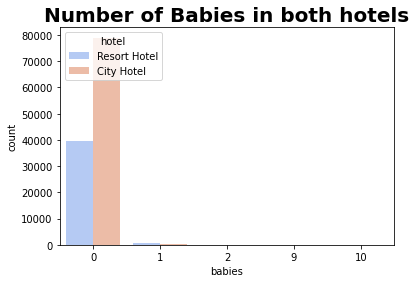

In [ ]:
sns.countplot(x='babies',hue='hotel', data=hotel_bookings, palette='coolwarm')
plt.title("Number of Babies in both hotels",fontweight="bold", size=20)


## **OBSERVATIONS:**

### Most visitors were arrived in pair with no children/ Babies and preferred City hotel over resort hotel

### Visitors who had 1 or 2 children also preferred city hotel

## **Overall Observations:**

* Majority hotels booked are city hotels.

*  We should target our advertisement on guests to increase returning guests.

* Majority of the guests are from Western Europe.

* We should also target months between May to Aug. Those are peak months due to the summer period.

# **THANK YOU**